<a href="https://colab.research.google.com/github/kaitlynchen1/PredictingHousingPrices/blob/main/housingprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ted8080 House Prices & Images** Kaggle dataset

- Follow the link to the dataset: https://www.kaggle.com/datasets/ted8080/house-prices-and-images-socal

- Set up Kaggle API keys

- Click 'download' and download via kagglehub

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import os

try:
    # Download dataset using kagglehub
    print("Downloading:")
    download_path = kagglehub.dataset_download("ted8080/house-prices-and-images-socal")
    print(f"Dataset downloaded to: {download_path}")

    # Find the CSV file in directory
    csv_file = None
    for root, dirs, files in os.walk(download_path):
        for file in files:
            if file.endswith('.csv'):
                csv_file = os.path.join(root, file)
                break
        if csv_file:
            break

    if not csv_file:
        raise FileNotFoundError("No CSV file found")

    print(f"Found CSV file at: {csv_file}")

    # Load data
    df = pd.read_csv(csv_file)

    # Data exploration
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nDataset shape:", df.shape)
    print("\nColumn types:")
    print(df.dtypes)
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Preprocessing
    target = 'price'
    if target not in df.columns:
        raise ValueError(f"'{target}' column not found. Available columns: {list(df.columns)}")

    X = df.drop(columns=[target])
    y = df[target].values.reshape(-1, 1)

    # Identify feature types
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    print(f"\nNumeric features ({len(numeric_features)}):", list(numeric_features))
    print(f"Categorical features ({len(categorical_features)}):", list(categorical_features))

    # Create preprocessing pipelines
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    # Process data
    print("\nPreprocessing data...")
    X_processed = preprocessor.fit_transform(X)

    print("\nProcessed features shape:", X_processed.shape)
    print("Target shape:", y.shape)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=0.2, random_state=42
    )

    print("\nTraining set:", X_train.shape, y_train.shape)
    print("Test set:", X_test.shape, y_test.shape)

except Exception as e:
    print(f"\nError: {str(e)}")
    print("Ensure you have a proper kagglehub setup")

Downloading:
Dataset downloaded to: /kaggle/input/house-prices-and-images-socal
Found CSV file at: /kaggle/input/house-prices-and-images-socal/socal2.csv

First 5 rows:
   image_id                 street             citi  n_citi  bed  bath  sqft  \
0         0  1317 Van Buren Avenue  Salton City, CA     317    3   2.0  1560   
1         1         124 C Street W      Brawley, CA      48    3   2.0   713   
2         2        2304 Clark Road     Imperial, CA     152    3   1.0   800   
3         3     755 Brawley Avenue      Brawley, CA      48    3   1.0  1082   
4         4  2207 R Carrillo Court     Calexico, CA      55    4   3.0  2547   

    price  
0  201900  
1  228500  
2  273950  
3  350000  
4  385100  

Dataset shape: (15474, 8)

Column types:
image_id      int64
street       object
citi         object
n_citi        int64
bed           int64
bath        float64
sqft          int64
price         int64
dtype: object

Missing values per column:
image_id    0
street      0
citi  

In [ ]:
# Exterior housing images and pricing dataset containing 8 variables & 15000+ rows in SoCal
! kaggle datasets download robinreni/house-rooms-image-dataset

# Around 3000 collective images of Bathroom, Bedroom, Living Room, Dining, & Kitchen spaces (does not contain price variable)
! kaggle datasets download mikhailma/house-rooms-streets-image-dataset

!wget https://github.com/emanhamed/Houses-dataset/tree/master/Houses%20Dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

**Robin Reni Rooms Images** Kaggle dataset (No price)

- Open the link and follow the steps from the previous code block: https://www.kaggle.com/datasets/robinreni/house-rooms-image-dataset

In [ ]:
import os
import zipfile
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import kagglehub

# Constants
IMAGE_SIZE = (128, 128)
DATASET_NAME = "robinreni/house-rooms-image-dataset"
PREPROCESSED_FOLDER = "preprocessed_data"
NUM_SAMPLES = 5250  # Set to None

def setup_directories():
    """Create necessary directories if they don't exist"""
    os.makedirs(PREPROCESSED_FOLDER, exist_ok=True)

def load_images_from_folder(folder, num_samples=None):
    """Load and preprocess images from folder structure"""
    images = []
    labels = []
    class_names = sorted([d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))])

    if not class_names:
        raise ValueError(f"No class folders found in {folder}")

    print("Found classes:", class_names)

    for class_idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder, class_name)
        print(f"\nLoading images from: {class_folder}")

        image_files = [f for f in os.listdir(class_folder)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not image_files:
            print(f"Warning: No images found in {class_folder}")
            continue

        for filename in tqdm(image_files[:num_samples] if num_samples else tqdm(image_files)):
            img_path = os.path.join(class_folder, filename)

            try:
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Warning: Failed to read {img_path}")
                    continue

                # Preprocess image
                img = cv2.resize(img, IMAGE_SIZE)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = img_to_array(img) / 255.0  # Normalize

                images.append(img)
                labels.append(class_idx)

            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

            # Early stopping if we have enough samples
            if num_samples and len(images) >= num_samples:
                break

        if num_samples and len(images) >= num_samples:
            break

    return np.array(images), np.array(labels)

def main():
    setup_directories()

    try:
        # Download dataset using kagglehub
        print(f"Downloading dataset {DATASET_NAME}...")
        dataset_path = kagglehub.dataset_download(DATASET_NAME)
        print(f"Dataset downloaded to: {dataset_path}")

        # Find the main dataset folder (it might be nested)
        dataset_subfolder = None
        for root, dirs, files in os.walk(dataset_path):
            if "House_Room_Dataset" in dirs:
                dataset_subfolder = os.path.join(root, "House_Room_Dataset")
                break

        if not dataset_subfolder:
            raise FileNotFoundError("Could not find folder in downloaded files")

        print("\nDataset contents:", os.listdir(dataset_subfolder))

        # Load and preprocess images
        X_images, Y = load_images_from_folder(dataset_subfolder, NUM_SAMPLES)
        print(f"\nSuccessfully loaded {len(X_images)} images")
        print(f"Image shape: {X_images[0].shape}")
        print(f"Labels shape: {Y.shape}")

        # Split dataset (stratified to maintain class balance)
        X_train, X_test, Y_train, Y_test = train_test_split(
            X_images, Y, test_size=0.2, random_state=42, stratify=Y
        )

        # Save processed data
        np.save(os.path.join(PREPROCESSED_FOLDER, "X_train.npy"), X_train)
        np.save(os.path.join(PREPROCESSED_FOLDER, "X_test.npy"), X_test)
        np.save(os.path.join(PREPROCESSED_FOLDER, "Y_train.npy"), Y_train)
        np.save(os.path.join(PREPROCESSED_FOLDER, "Y_test.npy"), Y_test)

        print(f"\nPreprocessed data saved to '{PREPROCESSED_FOLDER}' folder")

    except Exception as e:
        print(f"\nError: {str(e)}")
        print("Ensure you have a proper kagglehub setup")

if __name__ == "__main__":
    main()

Dataset downloaded to: /kaggle/input/house-rooms-image-dataset

Dataset contents: ['Livingroom', 'Bathroom', 'Bedroom', 'Kitchen', 'Dinning']
Found classes: ['Bathroom', 'Bedroom', 'Dinning', 'Kitchen', 'Livingroom']

Loading images from: /kaggle/input/house-rooms-image-dataset/House_Room_Dataset/Bathroom


100%|██████████| 606/606 [00:03<00:00, 192.77it/s]



Loading images from: /kaggle/input/house-rooms-image-dataset/House_Room_Dataset/Bedroom


100%|██████████| 1248/1248 [00:06<00:00, 181.53it/s]



Loading images from: /kaggle/input/house-rooms-image-dataset/House_Room_Dataset/Dinning


100%|██████████| 1158/1158 [00:07<00:00, 158.22it/s]



Loading images from: /kaggle/input/house-rooms-image-dataset/House_Room_Dataset/Kitchen


100%|██████████| 965/965 [00:04<00:00, 194.45it/s]



Loading images from: /kaggle/input/house-rooms-image-dataset/House_Room_Dataset/Livingroom


100%|█████████▉| 1272/1273 [00:06<00:00, 183.32it/s]



Successfully loaded 5250 images
Image shape: (128, 128, 3)
Labels shape: (5250,)

Preprocessed data saved to 'preprocessed_data' folder


**Mikhail Ma House Rooms & Streets** Kaggle dataset (No Price)

- Open the link and follow the steps from the first code block: https://www.kaggle.com/datasets/mikhailma/house-rooms-streets-image-dataset

- Set a limit with the max_images_per_class configuration based on your RAM usage and storage (this dataset has several images)

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import kagglehub

# Configuration
CONFIG = {
    "dataset_slug": "mikhailma/house-rooms-streets-image-dataset",
    "image_size": (128, 128),
    "preprocessed_folder": "preprocessed_data",
    "max_images_per_class": 2000, # Set a limit here
    "test_size": 0.2,
    "random_state": 42
}

def setup_environment():
    """Create necessary directories and verify dependencies"""
    os.makedirs(CONFIG["preprocessed_folder"], exist_ok=True)

    # Check if OpenCV is installed
    if cv2.__version__ is None:
        raise ImportError("Issue with OpenCV")

def load_and_preprocess_images(dataset_path):
    """Load images with preprocessing and class balancing"""
    # Find main folder
    dataset_subfolder = None
    for root, dirs, files in os.walk(dataset_path):
        if "kaggle_room_street_data" in dirs:
            dataset_subfolder = os.path.join(root, "kaggle_room_street_data")
            break

    if not dataset_subfolder:
        raise FileNotFoundError("Could not find 'kaggle_room_street_data' folder")

    print("\nDataset contents:", os.listdir(dataset_subfolder))

    class_names = sorted([d for d in os.listdir(dataset_subfolder)
                       if os.path.isdir(os.path.join(dataset_subfolder, d))])

    if not class_names:
        raise ValueError("No class folders found in dataset")

    print("Found classes:", class_names)

    images = []
    labels = []
    class_counts = {class_name: 0 for class_name in class_names}

    for class_idx, class_name in enumerate(class_names):
        class_folder = os.path.join(dataset_subfolder, class_name)
        image_files = [f for f in os.listdir(class_folder)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        print(f"\nProcessing {len(image_files)} images from {class_name}")

        # Apply limit per class if specified
        if CONFIG["max_images_per_class"]:
            image_files = image_files[:CONFIG["max_images_per_class"]]
            print(f"Limiting to {CONFIG['max_images_per_class']} images per class")

        for filename in tqdm(image_files):
            img_path = os.path.join(class_folder, filename)

            try:
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Warning: Failed to load {img_path}")
                    continue

                # Preprocessing pipeline
                img = cv2.resize(img, CONFIG["image_size"])
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = img_to_array(img) / 255.0  # Normalize

                images.append(img)
                labels.append(class_idx)
                class_counts[class_name] += 1

            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

    print("\nFinal class distribution:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

    return np.array(images), np.array(labels)

def save_data(X_train, X_test, y_train, y_test):
    """Save processed data with validation"""
    try:
        np.save(os.path.join(CONFIG["preprocessed_folder"], "X_train.npy"), X_train)
        np.save(os.path.join(CONFIG["preprocessed_folder"], "X_test.npy"), X_test)
        np.save(os.path.join(CONFIG["preprocessed_folder"], "y_train.npy"), y_train)
        np.save(os.path.join(CONFIG["preprocessed_folder"], "y_test.npy"), y_test)

        # Verify saved files
        for f in ["X_train.npy", "X_test.npy", "y_train.npy", "y_test.npy"]:
            if not os.path.exists(os.path.join(CONFIG["preprocessed_folder"], f)):
                raise FileNotFoundError(f"Failed to save {f}")

        print("\nData successfully saved to:", CONFIG["preprocessed_folder"])
    except Exception as e:
        print(f"\nError saving data: {str(e)}")

def main():
    setup_environment()

    try:
        # Download dataset
        print(f"Downloading dataset {CONFIG['dataset_slug']}...")
        dataset_path = kagglehub.dataset_download(CONFIG["dataset_slug"])
        print(f"Dataset downloaded to: {dataset_path}")

        X, y = load_and_preprocess_images(dataset_path)

        # Stratified split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=CONFIG["test_size"],
            random_state=CONFIG["random_state"],
            stratify=y
        )

        print("\nDataset split:")
        print(f"Train: {X_train.shape[0]} samples")
        print(f"Test: {X_test.shape[0]} samples")

        save_data(X_train, X_test, y_train, y_test)

    except Exception as e:
        print(f"\nError: {str(e)}")
        print("Ensure you have a proper kagglehub setup")

if __name__ == "__main__":
    main()

Dataset downloaded to: /kaggle/input/house-rooms-streets-image-dataset

Dataset contents: ['street_data', 'house_data']
Found classes: ['house_data', 'street_data']

Processing 5249 images from house_data
Limiting to 2000 images per class


100%|██████████| 2000/2000 [00:10<00:00, 186.95it/s]



Processing 19658 images from street_data
Limiting to 2000 images per class


100%|██████████| 2000/2000 [00:07<00:00, 253.96it/s]



Final class distribution:
house_data: 2000 images
street_data: 2000 images

Dataset split:
Train: 3200 samples
Test: 800 samples

Data successfully saved to: preprocessed_data


**GitHub** dataset with Price

Dataset containing 2140 images, 4 images for each house. Also contains a text file that contains the textual metadata of the dataset. More information here: https://github.com/emanhamed/Houses-dataset/blob/master/README.md

- First commented code portion indicates a fix in the case of running with a preexisting dataset



In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm

# First remove existing dataset if needed
if os.path.exists("/content/Houses-dataset"):
    !rm -rf /content/Houses-dataset

# Clone the repository
!git clone https://github.com/emanhamed/Houses-dataset.git /content/Houses-dataset

# Set paths
dataset_path = "/content/Houses-dataset/Houses Dataset"
info_file = os.path.join(dataset_path, "HousesInfo.txt")
output_folder = "/content/processed_houses"

# Configuration
CONFIG = {
    "image_size": (224, 224),
    "max_houses": None,
    "image_types": ["bedroom", "bathroom", "kitchen", "frontal"],
    "normalize_prices": True
}

def load_metadata(info_path):
    """Load and process the HousesInfo.txt file"""
    column_names = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
    metadata = pd.read_csv(info_path, sep=" ", header=None, names=column_names,
                         converters={"bathrooms": lambda x: float(x)})

    metadata["house_id"] = range(1, len(metadata)+1)
    metadata["zipcode"] = metadata["zipcode"].astype(int).astype(str)

    if CONFIG["normalize_prices"]:
        price_mean = metadata["price"].mean()
        price_std = metadata["price"].std()
        metadata["price_normalized"] = (metadata["price"] - price_mean) / price_std

    return metadata

def load_and_process_images(metadata):
    """Load and preprocess images"""
    images = {}
    house_data = {}

    for house_id in metadata["house_id"]:
        images[house_id] = {img_type: None for img_type in CONFIG["image_types"]}
        house_data[house_id] = metadata[metadata["house_id"] == house_id].iloc[0].to_dict()

    image_files = [f for f in os.listdir(dataset_path)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for filename in tqdm(image_files, desc="Processing images"):
        try:
            parts = filename.split("_")
            if len(parts) != 2:
                continue

            house_id = int(parts[0])
            img_type = parts[1].split(".")[0].lower()

            if img_type not in CONFIG["image_types"] or house_id not in images:
                continue

            img_path = os.path.join(dataset_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, CONFIG["image_size"])
            images[house_id][img_type] = img_to_array(img) / 255.0

        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
            continue

    return images, house_data

def save_processed_data(images, house_data):
    """Save processed data"""
    os.makedirs(output_folder, exist_ok=True)

    # Save per-house data
    complete_houses = []
    for house_id, img_data in images.items():
        if all(img is not None for img in img_data.values()):
            complete_houses.append({
                "house_id": house_id,
                **house_data[house_id],
                **{f"image_{k}": v for k, v in img_data.items()}
            })

    # Save numpy arrays
    house_images = np.array([[
        h[f"image_{img_type}"] for img_type in CONFIG["image_types"]
    ] for h in complete_houses])

    np.save(os.path.join(output_folder, "house_images.npy"), house_images)

    # Save metadata
    metadata_df = pd.DataFrame(complete_houses)
    metadata_df.to_csv(os.path.join(output_folder, "metadata.csv"), index=False)

    print(f"\nSaved {len(complete_houses)} complete houses")
    print(f"Images shape: {house_images.shape}")
    print(f"Metadata columns: {metadata_df.columns.tolist()}")

# Main processing
try:
    print("Starting dataset processing...")

    metadata = load_metadata(info_file)
    if CONFIG["max_houses"]:
        metadata = metadata.head(CONFIG["max_houses"])

    images, house_data = load_and_process_images(metadata)
    save_processed_data(images, house_data)

except Exception as e:
    print(f"\nError: {str(e)}")

Cloning into '/content/Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165 (from 1)
Receiving objects: 100% (2166/2166), 176.26 MiB | 42.10 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Starting dataset processing...


Processing images: 100%|██████████| 2140/2140 [00:10<00:00, 196.17it/s]



Saved 535 complete houses
Images shape: (535, 4, 224, 224, 3)
Metadata columns: ['house_id', 'bedrooms', 'bathrooms', 'area', 'zipcode', 'price', 'price_normalized', 'image_bedroom', 'image_bathroom', 'image_kitchen', 'image_frontal']


**Unified data loader**

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

class HousePriceDataLoader:
    def __init__(self):
        self.scaler = StandardScaler()
        self.datasets = {
            'ted8080': self._load_ted8080,
            'github': self._load_github,
            'robinreni': self._load_robinreni,
            'mikhailma': self._load_mikhailma
        }

    def load_dataset(self, dataset_name, data_path):
        """Main loader interface"""
        if dataset_name not in self.datasets:
            raise ValueError(f"Unknown dataset: {dataset_name}. Choose from {list(self.datasets.keys())}")
        return self.datasets[dataset_name](data_path)

    def _load_ted8080(self, path):
        """Load preprocessed Ted8080 data"""
        X = np.load(os.path.join(path, "X_processed.npy"))
        y = np.load(os.path.join(path, "y.npy"))

        # Ted8080 specific processing
        X = self.scaler.fit_transform(X)
        return X, y, None  # No images in this dataset

    def _load_github(self, path):
        """Load GitHub houses dataset"""
        images = np.load(os.path.join(path, "house_images.npy"))
        metadata = pd.read_csv(os.path.join(path, "metadata.csv"))

        # Extract features
        X_tabular = metadata[['bedrooms', 'bathrooms', 'area']].values
        X_tabular = self.scaler.fit_transform(X_tabular)
        y = metadata['price'].values

        return X_tabular, y, images

    def _load_robinreni(self, path):
        """Load Robinreni dataset (classification)"""
        X_train = np.load(os.path.join(path, "X_train.npy"))
        X_test = np.load(os.path.join(path, "X_test.npy"))
        y_train = np.load(os.path.join(path, "Y_train.npy"))
        y_test = np.load(os.path.join(path, "Y_test.npy"))

        # Combine train/test
        X = np.concatenate([X_train, X_test])
        y = np.concatenate([y_train, y_test])

        return None, y, X  # Using images only

    def _load_mikhailma(self, path):
        """Load Mikhailma dataset"""
        X_train = np.load(os.path.join(path, "X_train.npy"))
        y_train = np.load(os.path.join(path, "y_train.npy"))

        return None, y_train, X_train  # Using images only

**Display Prices**

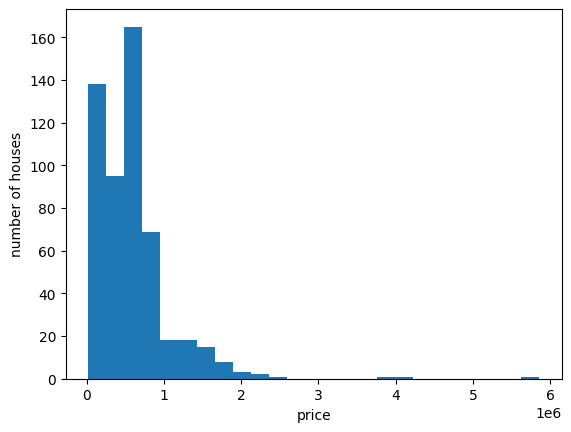

In [ ]:
import matplotlib.pyplot as plt


plt.hist(metadata['price'], bins=25)
plt.ylabel('number of houses')
plt.xlabel('price')
plt.show()

**Display Prices (Normalized)**

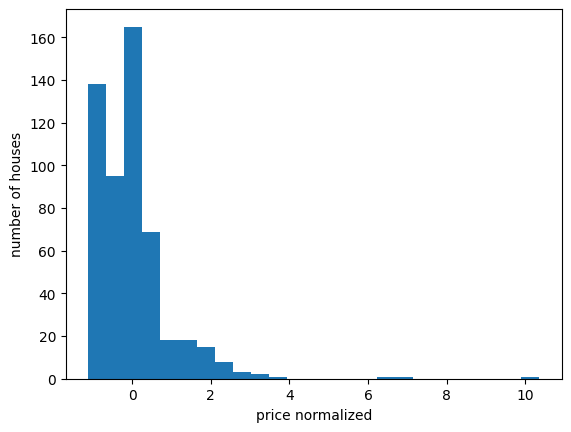

In [ ]:
plt.hist(metadata['price_normalized'], bins=25)
plt.ylabel('number of houses')
plt.xlabel('price normalized')
plt.show()

**Baseline Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import json
import os
%matplotlib inline

class HousePriceBaseline:
    def __init__(self, random_state=42):

        # RandomForest seed
        self.model = RandomForestRegressor(
            n_estimators=100,
            random_state=random_state,
            max_depth=10,
            min_samples_leaf=4
        )
        self.scaler = StandardScaler()
        self.feature_importances_ = None
        self.evaluation_metrics = {}
        self.random_state = random_state
        self._create_output_folders()

    def _create_output_folders(self):
        os.makedirs('models', exist_ok=True)
        os.makedirs('results', exist_ok=True)
        os.makedirs('plots', exist_ok=True)

    def load_data(self, data_path):
        """
        Load and preprocess data meeting requirements

        Args:
            data_path (str): Path to dataset CSV or NPY files

        Returns:
            X_train, X_test, y_train, y_test
        """
        # Example loading - adapt to your actual data source
        if data_path.endswith('.csv'):
            data = pd.read_csv(data_path)
            X = data.drop('price', axis=1)
            y = data['price']

            # Convert categoricals if needed
            if 'zipcode' in X.columns:
                X = pd.get_dummies(X, columns=['zipcode'])

        elif data_path.endswith('.npy'):
            X = np.load(os.path.join(data_path, 'X.npy'))
            y = np.load(os.path.join(data_path, 'y.npy'))
        else:
            raise ValueError("Unsupported file format")

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=self.random_state
        )

        # Scale numerical features
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
        self.scaler.fit(X_train[numerical_cols])

        X_train[numerical_cols] = self.scaler.transform(X_train[numerical_cols])
        X_test[numerical_cols] = self.scaler.transform(X_test[numerical_cols])

        return X_train, X_test, y_train, y_test

    def train(self, X_train, y_train):
        """Train model with progress tracking"""
        print("Training baseline model...")
        self.model.fit(X_train, y_train)
        self.feature_importances_ = pd.DataFrame({
            'feature': X_train.columns,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)
        print("Training completed")

    def evaluate(self, X_test, y_test):
        """Comprehensive evaluation meeting requirements"""
        y_pred = self.model.predict(X_test)

        self.evaluation_metrics = {
            'mae': mean_absolute_error(y_test, y_pred),
            'mse': mean_squared_error(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mape': np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        }

        # Save metrics
        with open('results/baseline_metrics.json', 'w') as f:
            json.dump(self.evaluation_metrics, f, indent=2)

        return self.evaluation_metrics

    def analyze_predictions(self, X_test, y_test):
        """Prediction analysis meeting requirements"""
        y_pred = self.model.predict(X_test)
        errors = y_test - y_pred

        # Plot error distribution
        plt.figure(figsize=(10, 6))
        plt.hist(errors, bins=30)
        plt.xlabel('Prediction Error ($)')
        plt.ylabel('Frequency')
        plt.title('Prediction Error Distribution')
        plt.savefig('plots/error_distribution.png')
        plt.close()

        # Find worst predictions
        worst_indices = np.argsort(np.abs(errors))[-10:]
        worst_predictions = pd.DataFrame({
            'Actual': y_test.iloc[worst_indices],
            'Predicted': y_pred[worst_indices],
            'Error': errors.iloc[worst_indices],
            'Error_Percentage': (errors.iloc[worst_indices] / y_test.iloc[worst_indices]) * 100
        })
        worst_predictions.to_csv('results/worst_predictions.csv', index=False)

        return worst_predictions

    def save_model(self):
        """Save model and artifacts for reproducibility"""
        # Save model
        with open('models/baseline_model.pkl', 'wb') as f:
            pickle.dump(self.model, f)

        # Save feature importances
        self.feature_importances_.to_csv('results/feature_importances.csv', index=False)

        # Save config
        config = {
            'model_type': 'RandomForestRegressor',
            'random_state': self.random_state,
            'features': list(self.feature_importances_['feature'])
        }
        with open('models/baseline_config.json', 'w') as f:
            json.dump(config, f, indent=2)

    def generate_report(self):
        """Generate markdown report meeting requirements"""
        report = f"""
        # Baseline Model Report

        ## Evaluation Metrics
        - MAE: ${self.evaluation_metrics['mae']:,.2f}
        - RMSE: ${self.evaluation_metrics['rmse']:,.2f}
        - MAPE: {self.evaluation_metrics['mape']:.1f}%

        ## Feature Importances
        {self.feature_importances_.head(10).to_markdown()}

        ## Analysis
        ![Error Distribution](plots/error_distribution.png)

        See complete results in the results/ directory.
        """

        with open('results/baseline_report.md', 'w') as f:
            f.write(report)

        return report

**Evaluate Baseline Model**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Initialize data loader and baseline
loader = HousePriceDataLoader()
baseline = HousePriceBaseline(random_state=42)

X, y, images = loader.load_dataset('github', '/content/processed_houses')

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to DataFrame for feature names (needed by baseline)
if not isinstance(X_train, pd.DataFrame):
    feature_names = ['bedrooms', 'bathrooms', 'area']
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Train baseline
baseline.train(X_train, y_train)

# Evaluate baseline
metrics = baseline.evaluate(X_test, y_test)
print("Evaluation metrics:", metrics)

# Save trained model and related files
baseline.save_model()

# print the report
report = baseline.generate_report()
print(report)

import os

folder_name = 'preprocessed_data'

if os.path.isdir(folder_name):
    print(f"Folder '{folder_name}' found at: {os.path.abspath(folder_name)}")
else:
    print(f"Folder '{folder_name}' not found in the current directory: {os.getcwd()}")



Training baseline model...
Training completed
Evaluation metrics: {'mae': 245848.30373337056, 'mse': 105477715587.5296, 'rmse': np.float64(324773.3295508263), 'mape': np.float64(73.8535132281688)}

        # Baseline Model Report

        ## Evaluation Metrics
        - MAE: $245,848.30
        - RMSE: $324,773.33
        - MAPE: 73.9%

        ## Feature Importances
        |    | feature   |   importance |
|---:|:----------|-------------:|
|  2 | area      |     0.682418 |
|  1 | bathrooms |     0.210284 |
|  0 | bedrooms  |     0.107298 |

        ## Analysis
        ![Error Distribution](plots/error_distribution.png)

        See complete results in the results/ directory.
        
Folder 'preprocessed_data' found at: /content/preprocessed_data


**Deep Learning Model (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, Dense, Flatten, Conv2D, Concatenate,
                                    BatchNormalization, Dropout, MaxPooling2D)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import logging

class HousePriceCNN:
    def __init__(self, img_shape=(224, 224, 3), num_tabular_features=3):
        """
        CNN-based house price predictor with multimodal inputs (images + tabular data)

        Args:
            img_shape (tuple): Shape of input images (height, width, channels)
            num_tabular_features (int): Number of tabular features (0 if no tabular data)
        """
        self.img_shape = img_shape
        self.num_tabular_features = num_tabular_features
        self.model = None
        self.logger = logging.getLogger(__name__)
        self._build_model()
        self.compile()

    def _build_model(self):
        """Build the multimodal CNN architecture"""
        # Image processing branch
        img_input = Input(shape=self.img_shape, name='image_input')
        x = Conv2D(32, (3,3), activation='relu', padding='same')(img_input)
        x = BatchNormalization()(x)
        x = MaxPooling2D()(x)
        x = Dropout(0.2)(x)

        x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D()(x)
        x = Dropout(0.3)(x)

        x = Flatten()(x)

        # Tabular data branch (if tabular features exist)
        if self.num_tabular_features > 0:
            tab_input = Input(shape=(self.num_tabular_features,), name='tabular_input')
            y = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(tab_input)
            y = BatchNormalization()(y)
            y = Dropout(0.2)(y)

            combined = Concatenate()([x, y])
        else:
            tab_input = None
            combined = x

        # Regression head
        z = Dense(128, activation='relu')(combined)
        z = Dropout(0.3)(z)
        output = Dense(1, activation='linear', name='price_output')(z)

        # Create model
        inputs = [img_input, tab_input] if tab_input is not None else img_input
        self.model = Model(inputs=inputs, outputs=output)

    def compile(self, lr=0.001):
        """Compile the model with optimizer and metrics"""
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='mae',
            metrics=['mae', 'mse']
        )

    def train(self, X_images, X_tabular, y, epochs=50, batch_size=32,
              validation_data=None, callbacks=None):
        """
        Train the model with optional callbacks

        Args:
            X_images: Input images
            X_tabular: Tabular features (None if not available)
            y: Target prices
            epochs: Number of training epochs
            batch_size: Batch size
            validation_data: Tuple of (X_val_images, X_val_tabular, y_val)
            callbacks: List of Keras callbacks

        Returns:
            Training history
        """
        # Prepare inputs
        train_inputs = [X_images, X_tabular] if X_tabular is not None else X_images

        # Default callbacks
        if callbacks is None:
            callbacks = [
                EarlyStopping(patience=10, restore_best_weights=True),
                ReduceLROnPlateau(factor=0.1, patience=5)
            ]

        # Add validation data if provided
        validation = None
        if validation_data is not None:
            X_val_images, X_val_tabular, y_val = validation_data
            val_inputs = [X_val_images, X_val_tabular] if X_val_tabular is not None else X_val_images
            validation = (val_inputs, y_val)

        history = self.model.fit(
            train_inputs, y,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=validation,
            callbacks=callbacks,
            verbose=1
        )

        return history

    def evaluate(self, X_images, X_tabular, y_true, verbose=1):
        """
        Evaluate model performance and display metrics

        Args:
            X_images: Input images
            X_tabular: Tabular features (None if not available)
            y_true: True target values
            verbose: 0=silent, 1=metrics, 2=metrics+plots

        Returns:
            Dictionary of evaluation metrics
        """
        # Make predictions
        inputs = [X_images, X_tabular] if X_tabular is not None else X_images
        y_pred = self.model.predict(inputs).flatten()

        # Calculate metrics
        metrics = {
            'MAE': mean_absolute_error(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'R2': r2_score(y_true, y_pred),
            'MAPE': self._calculate_mape(y_true, y_pred)
        }

        if verbose >= 1:
            print("\nModel Evaluation Metrics:")
            for name, value in metrics.items():
                print(f"{name}: {value:.4f}")

        if verbose >= 2:
            self._plot_evaluation(y_true, y_pred)

        return metrics

    def _calculate_mape(self, y_true, y_pred):
        """Calculate Mean Absolute Percentage Error"""
        mask = y_true != 0  # Avoid division by zero
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    def _plot_evaluation(self, y_true, y_pred):
        """Visualize model performance"""
        plt.figure(figsize=(15, 5))

        # Error distribution
        plt.subplot(1, 2, 2)
        errors = y_pred - y_true
        plt.hist(errors, bins=30)
        plt.xlabel('Prediction Error')
        plt.ylabel('Frequency')
        plt.title('Error Distribution')

        plt.tight_layout()
        plt.show()

    def display_training_history(self, history):
        """Plot training history metrics"""
        if not hasattr(history, 'history'):
            raise ValueError("No training history available")

        plt.figure(figsize=(12, 5))

        # Plot MAE
        plt.subplot(1, 2, 1)
        plt.plot(history.history['mae'], label='Train MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('Model MAE')
        plt.ylabel('MAE')
        plt.xlabel('Epoch')
        plt.legend()

        # Plot Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def summary(self):
        """Print model summary"""
        self.model.summary()

    def save(self, filepath):
        """Save the model to file"""
        self.model.save(filepath)
        self.logger.info(f"Model saved to {filepath}")

    @classmethod
    def load(cls, filepath):
        """Load a saved model"""
        model = tf.keras.models.load_model(filepath)
        # Infer shapes from loaded model
        img_shape = model.input_shape[0][1:] if isinstance(model.input, list) else model.input_shape[1:]
        num_tabular = model.input_shape[1][1] if isinstance(model.input, list) else 0

        cnn_model = cls(img_shape=img_shape, num_tabular_features=num_tabular)
        cnn_model.model = model
        return cnn_model

**Deep Learning Model Evaluation**

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64, 64,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     18,496 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tabular_input       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        128 │ tabular_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32, 32,    │          0 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 65536)     │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 65568)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │  8,392,832 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price_output        │ (None, 1)         │        129 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 8,412,993 (32.09 MB)

 Trainable params: 8,412,737 (32.09 MB)

 Non-trainable params: 256 (1.00 KB)


Starting training...
Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - loss: 262179.7500 - mae: 262179.6875 - mse: 85511012352.0000 - val_loss: 277739.7812 - val_mae: 277739.7500 - val_mse: 94851907584.0000 - learning_rate: 0.0010
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - loss: 242718.0625 - mae: 242718.0625 - mse: 75252301824.0000 - val_loss: 277266.1875 - val_mae: 277266.1562 - val_mse: 94588895232.0000 - learning_rate: 0.0010
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 212801.9219 - mae: 212801.8906 - mse: 61926363136.0000 - val_loss: 273503.9062 - val_mae: 273503.8750 - val_mse: 92516933632.0000 - learning_rate: 0.0010
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 152973.8281 - mae: 152973.7812 - mse: 35292426240.0000 - val_loss: 260443.0781 - val_mae: 260443.0625 - val_mse: 85544878080.0000 - learning_rate: 0.0010
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 120094.6875 - mae: 120094.6562 - mse: 21688242176.0000 - val_loss: 25241

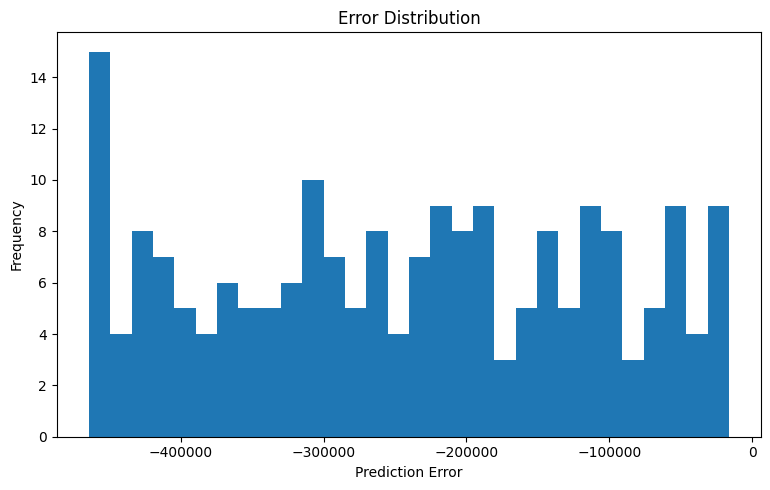


Training History:


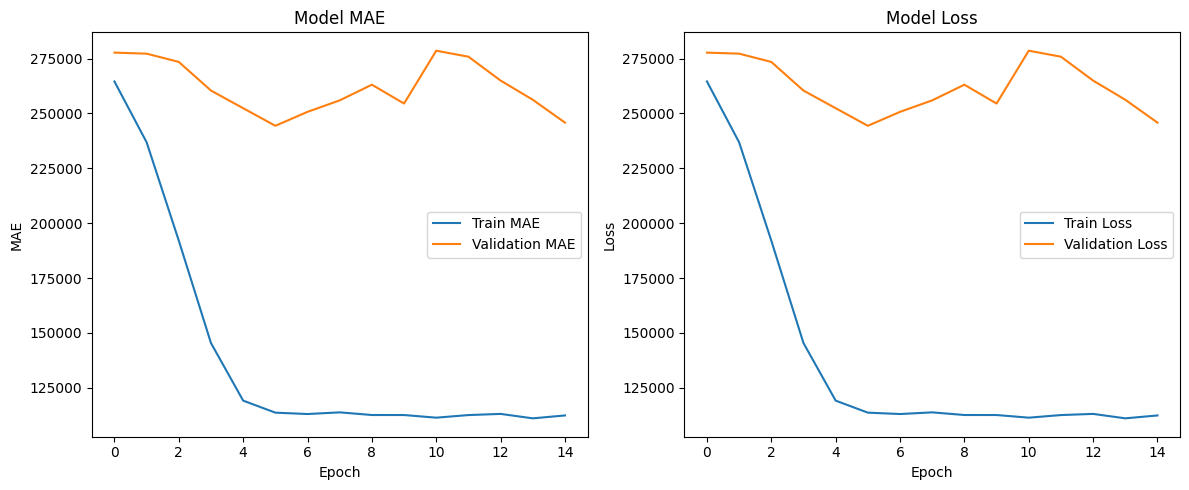

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Create synthetic data for demonstration
num_samples = 1000
img_shape = (128, 128, 3)
num_tabular_features = 3

# Random image data (normalized 0-1)
X_images = np.random.rand(num_samples, *img_shape)
# Random tabular data
X_tabular = np.random.rand(num_samples, num_tabular_features)
# Synthetic prices (50,000-500,000 range)
y_prices = np.random.uniform(50000, 500000, num_samples)

# 2. Split into train/test
from sklearn.model_selection import train_test_split
X_img_train, X_img_test, X_tab_train, X_tab_test, y_train, y_test = train_test_split(
    X_images, X_tabular, y_prices, test_size=0.2, random_state=42
)

# 3. Initialize, train, and evaluate model
model = HousePriceCNN(img_shape=img_shape, num_tabular_features=num_tabular_features)
model.summary()  # This should show model architecture

# Train the model
print("\nStarting training...")
history = model.train(
    X_img_train,
    X_tab_train,
    y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_img_test, X_tab_test, y_test)
)

# 4. Evaluate and show results
print("\nEvaluating model...")
test_metrics = model.evaluate(X_img_test, X_tab_test, y_test, verbose=2)

# 5. Show training history
print("\nTraining History:")
model.display_training_history(history)

**Results**

Baseline:
- MAE: 245,848.30
- RMSE: 324,773.33
- MAPE: 73.9%

CNN:
- MAE: 244387.4402
- RMSE: 278283.6216
- MAPE: 82.5%

Overall, the CNN deep learning model displayed a slightly higher predictive power, but the MAPE percentage increase suggests a slightly lower optimization and refinement of the CNN model.